In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
wavelengths = np.load('wavelengths.npy')
labels = pd.read_csv('labels.csv')
spectra = pd.read_csv('spectra.csv').to_numpy()
aux_data = pd.read_csv('aux_data.csv')

### The labels contain the foward model parameters:
- Planet Temperature in Kelvin
- Log of the absolute concentration of each of the absorbers

Note in these atmospheres the remaining fraction of the gasses is assumed to be a mixture of 83% $H_2$ and 17% $He$

In [3]:
labels

,planet_temp,log(X_H2O),log(X_CO2),log(X_CH4),log(X_CO),log(X_NH3)
0,2224.531730,-6.380111,-6.572346,-3.467729,-3.552412,-6.039300
1,853.088814,-5.766253,-5.092919,-6.390290,-4.011420,-5.636172
2,459.835595,-7.817120,-4.064273,-3.355111,-3.331943,-5.288430
3,1490.487796,-4.148421,-7.516717,-4.984230,-3.927792,-5.184763
4,749.616817,-7.306708,-5.848257,-4.865771,-5.215140,-7.157368
...,...,...,...,...,...,...
105882,1230.274532,-5.610091,-7.173193,-5.096518,-3.397266,-4.400357
105883,1218.571572,-8.306286,-4.758709,-3.964018,-3.146747,-5.339986
105884,1125.496097,-5.410777,-8.539973,-8.684864,-5.008298,-8.062786
105885,818.176365,-3.280500,-5.285857,-3.157887,-4.717893,-4.934644


#### We also have some auxiliary data


In [4]:
aux_data

,star_distance,star_mass_kg,star_radius_m,star_temperature,planet_mass_kg,planet_orbital_period,planet_distance,planet_radius_m,planet_surface_gravity
0,705.8510,5.346528e+30,2.344509e+09,9195.0,9.718847e+26,10.911880,0.133882,9.000009e+07,8.008170
1,1008.7900,2.306555e+30,1.140948e+09,6200.0,5.504577e+25,30.652800,0.201421,1.908836e+07,10.083029
2,1175.2200,2.048062e+30,7.165710e+08,5825.0,5.694390e+25,85.735028,0.384318,1.944582e+07,10.050762
3,758.1990,1.689751e+30,6.962079e+08,5430.0,4.637033e+26,2.150451,0.030883,6.679643e+07,6.936464
4,769.2000,1.809453e+30,6.052590e+08,5485.0,3.226821e+25,13.646182,0.108308,1.386945e+07,11.195952
...,...,...,...,...,...,...,...,...,...
105882,491.6220,2.050597e+30,7.304850e+08,5925.1,3.780137e+27,4.847033,0.056630,1.160878e+08,18.721422
105883,316.2280,2.444501e+30,9.809370e+08,6287.0,5.845508e+27,8.493018,0.087271,1.352744e+08,21.320410
105884,1050.6400,1.869105e+30,6.678720e+08,5888.0,2.923120e+25,5.687945,0.061092,1.315453e+07,11.274586
105885,90.8693,1.470204e+30,5.090430e+08,4820.4,4.095464e+25,6.096347,0.059057,1.585274e+07,10.876742


### Spectra

Text(0, 0.5, 'Modulation')

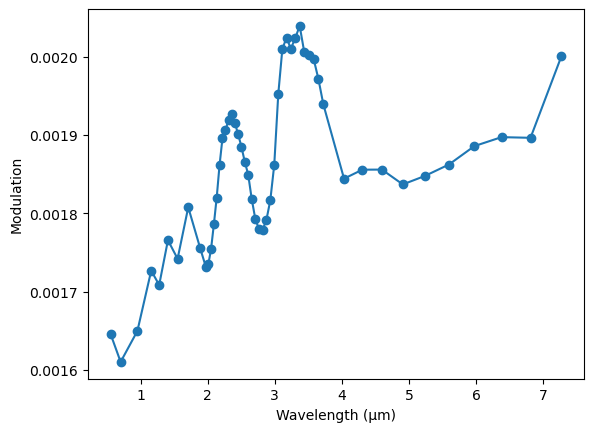

In [5]:
plt.plot(wavelengths, spectra[0], '-o')
plt.xlabel('Wavelength (µm)')
plt.ylabel('Modulation')

Note that the auxiliary data can be very useful in explaining the varience of the spectral data

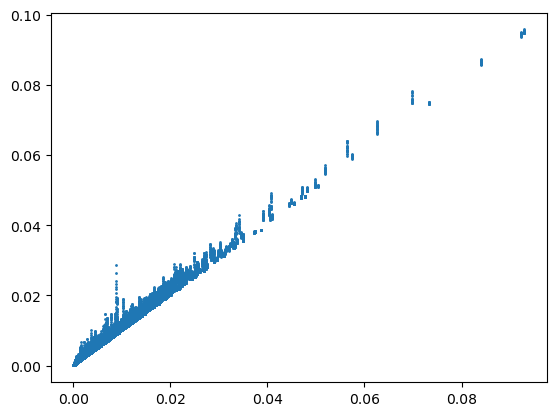

In [6]:
ratio = aux_data['planet_radius_m'].values / aux_data['star_radius_m'].values
plt.scatter(ratio**2, spectra.mean(axis=1), s=1)